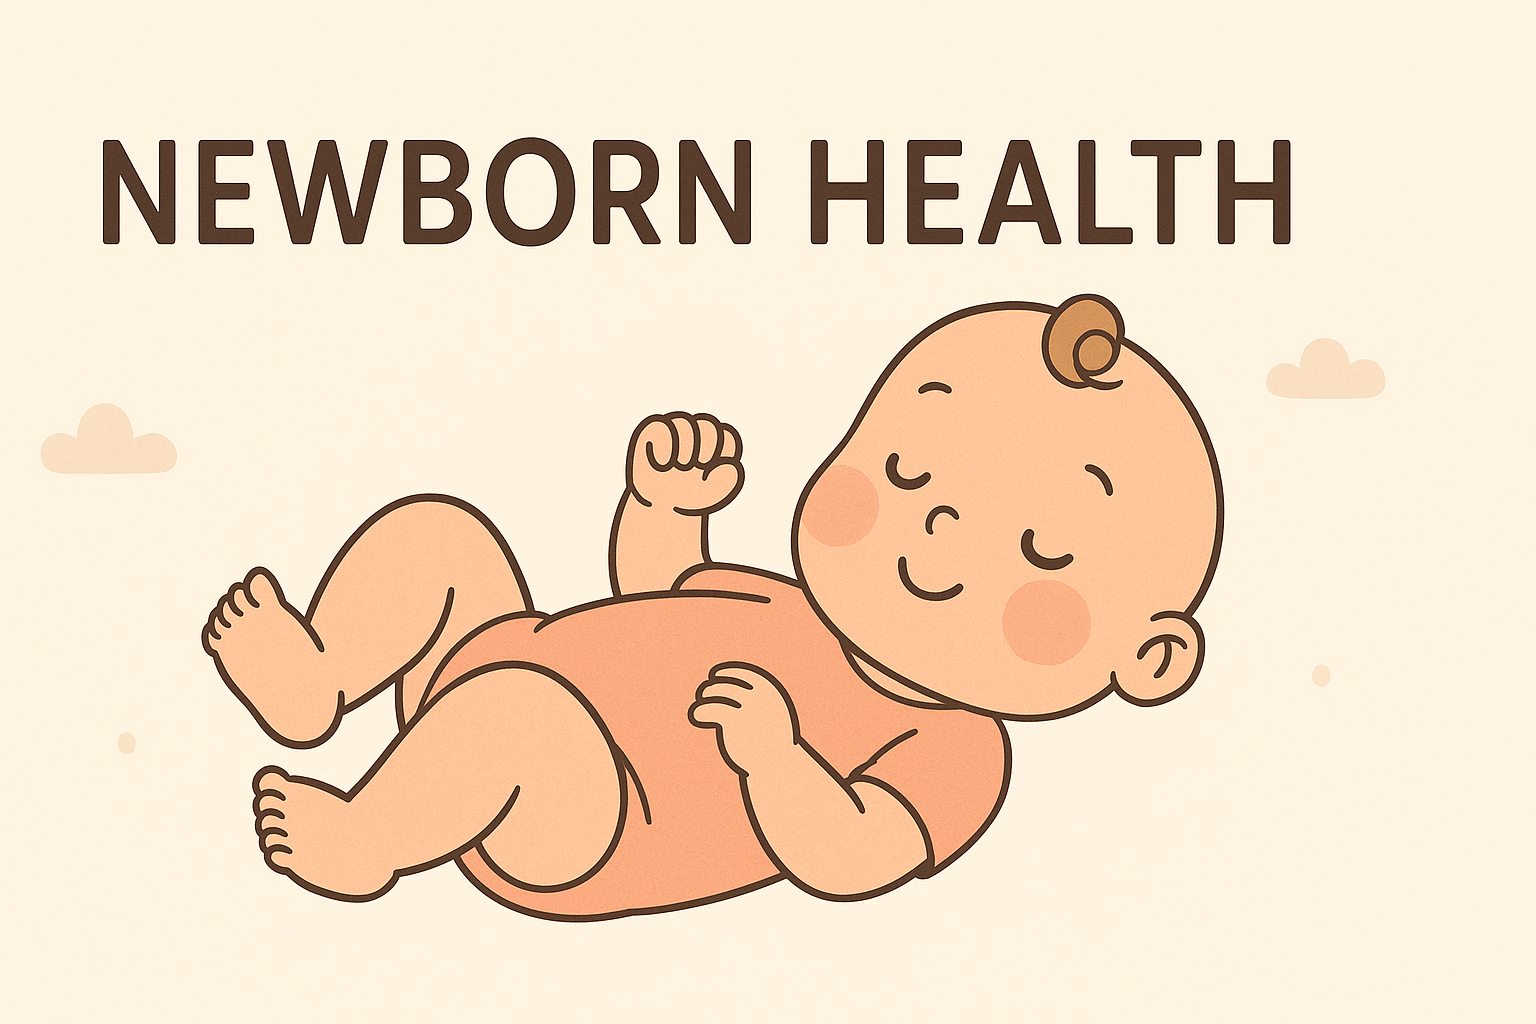

In [19]:
import pandas as pd


df = pd.read_csv("newborn_health_monitoring_with_risk.csv")


df.head(20)


baby_id  name  gender  gestational_age_weeks  birth_weight_kg  \
0     B001  Sara  Female                   40.2              3.3   
1     B001  Sara  Female                   40.2              3.3   
2     B001  Sara  Female                   40.2              3.3   
3     B001  Sara  Female                   40.2              3.3   
4     B001  Sara  Female                   40.2              3.3   
5     B001  Sara  Female                   40.2              3.3   
6     B001  Sara  Female                   40.2              3.3   
7     B001  Sara  Female                   40.2              3.3   
8     B001  Sara  Female                   40.2              3.3   
9     B001  Sara  Female                   40.2              3.3   
10    B001  Sara  Female                   40.2              3.3   
11    B001  Sara  Female                   40.2              3.3   
12    B001  Sara  Female                   40.2              3.3   
13    B001  Sara  Female                   40.2              3.3   
14    B001  Sara  Female                   40.2              3.3   
15    B001  Sara  Female                   40.2              3.3   
16    B001  Sara  Female                   40.2              3.3   
17    B001  Sara  Female                   40.2              3.3   
18    B001  Sara  Female                   40.2              3.3   
19    B001  Sara  Female                   40.2              3.3   

    birth_length_cm  birth_head_circumference_cm        date  age_days  \
0              50.0                         31.9  2024-12-10         1   
1              50.0                         31.9  2024-12-11         2   
2              50.0                         31.9  2024-12-12         3   
3              50.0                         31.9  2024-12-13         4   
4              50.0                         31.9  2024-12-14         5   
5              50.0                         31.9  2024-12-15         6   
6              50.0                         31.9  2024-12-16         7   
7              50.0                         31.9  2024-12-17         8   
8              50.0                         31.9  2024-12-18         9   
9              50.0                         31.9  2024-12-19        10   
10             50.0                         31.9  2024-12-20        11   
11             50.0                         31.9  2024-12-21        12   
12             50.0                         31.9  2024-12-22        13   
13             50.0                         31.9  2024-12-23        14   
14             50.0                         31.9  2024-12-24        15   
15             50.0                         31.9  2024-12-25        16   
16             50.0                         31.9  2024-12-26        17   
17             50.0                         31.9  2024-12-27        18   
18             50.0                         31.9  2024-12-28        19   
19             50.0                         31.9  2024-12-29        20   

    weight_kg  ...  oxygen_saturation   feeding_type  \
0        3.28  ...                 98        Formula   
1        3.35  ...                 99        Formula   
2        3.35  ...                 97  Breastfeeding   
3        3.48  ...                 97          Mixed   
4        3.50  ...                 96  Breastfeeding   
5        3.46  ...                 97          Mixed   
6        3.53  ...                 98        Formula   
7        3.57  ...                 98        Formula   
8        3.51  ...                 97          Mixed   
9        3.69  ...                 96          Mixed   
10       3.68  ...                 97          Mixed   
11       3.64  ...                 96  Breastfeeding   
12       3.67  ...                 97  Breastfeeding   
13       3.77  ...                 97          Mixed   
14       3.82  ...                 96  Breastfeeding   
15       3.83  ...                 99  Breastfeeding   
16       3.80  ...                 99  Breastfeeding   
17       3.

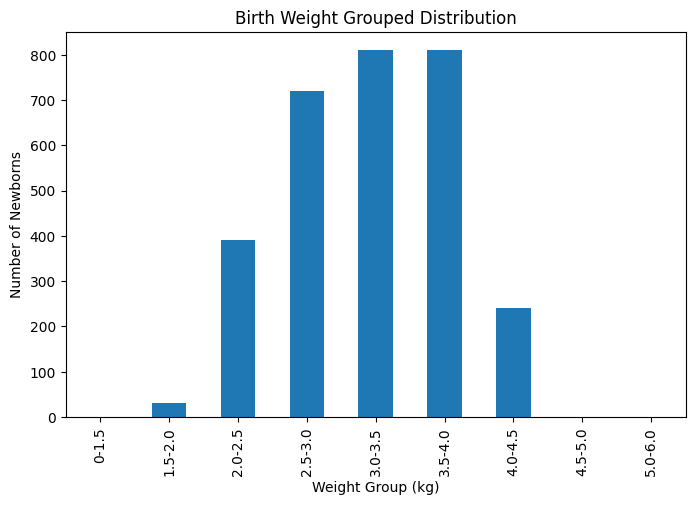

In [10]:
import matplotlib.pyplot as plt


bins = [0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df['weight_group'] = pd.cut(df['birth_weight_kg'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8,5))
df['weight_group'].value_counts().sort_index().plot(kind='bar')

plt.title("Birth Weight Grouped Distribution")
plt.xlabel("Weight Group (kg)")
plt.ylabel("Number of Newborns")
plt.show()




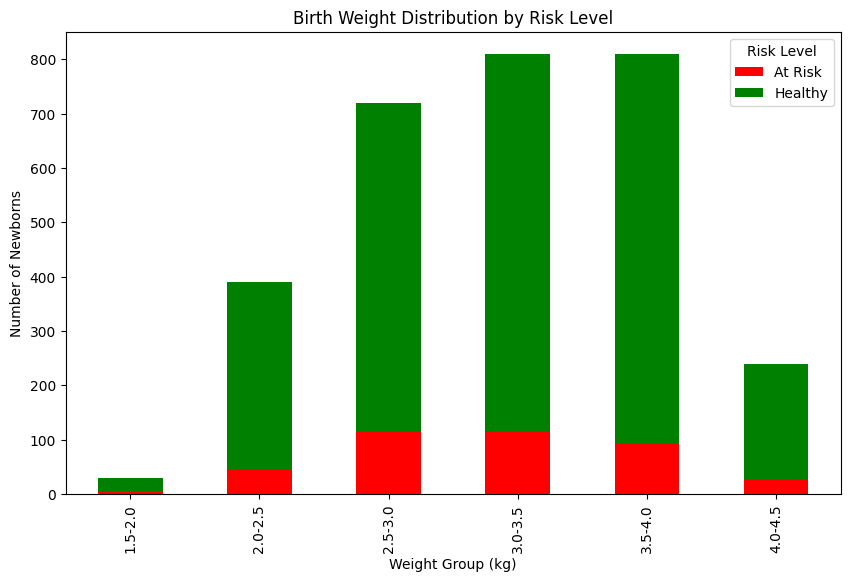

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Define bins and labels
bins = [0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Create weight group column
df['weight_group'] = pd.cut(df['birth_weight_kg'], bins=bins, labels=labels, right=False)

# Create a crosstab: counts of risk_level within each weight group
grouped = pd.crosstab(df['weight_group'], df['risk_level'])

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, color={'At Risk':'red', 'Healthy':'green'}, figsize=(10,6))

plt.title("Birth Weight Distribution by Risk Level")
plt.xlabel("Weight Group (kg)")
plt.ylabel("Number of Newborns")
plt.legend(title="Risk Level")
plt.show()


**The labeling of “Healthy” and “At Risk” in this dataset seems to be defined by specific criteria that do not strictly match the medical understanding of neonatal risk. Since the classification likely takes into account multiple indicators, not just birth weight, it can create a mismatch — for example, babies born with very low weight being treated as if they were comparable to those with normal weight.**

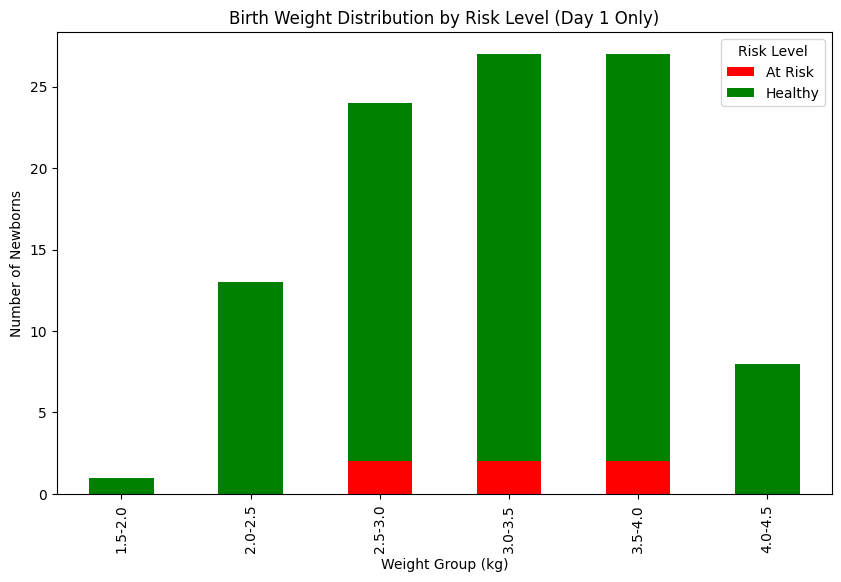

In [14]:
# Filter to only include newborns at age_days = 1 (day of birth)
df_birth = df[df['age_days'] == 1].copy()

# Define bins and labels for birth weight
bins = [0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Create weight group column
df_birth['weight_group'] = pd.cut(df_birth['birth_weight_kg'], bins=bins, labels=labels, right=False)

# Create crosstab of weight group vs risk level
grouped_birth = pd.crosstab(df_birth['weight_group'], df_birth['risk_level'])

# Plot stacked bar chart
grouped_birth.plot(
    kind='bar',
    stacked=True,
    color={'At Risk':'red', 'Healthy':'green'},
    figsize=(10,6)
)

plt.title("Birth Weight Distribution by Risk Level (Day 1 Only)")
plt.xlabel("Weight Group (kg)")
plt.ylabel("Number of Newborns")
plt.legend(title="Risk Level")
plt.show()


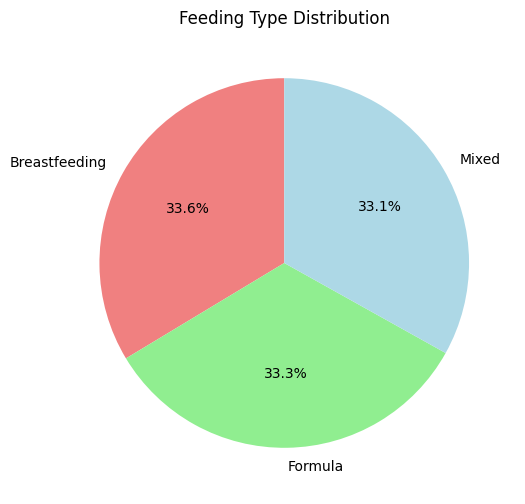

In [15]:
# Count each feeding type
feeding_counts = df['feeding_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
feeding_counts.plot(
    kind='pie',
    autopct='%1.1f%%',   # show percentage
    startangle=90,       # rotate start angle
    colors=['lightcoral', 'lightgreen', 'lightblue']  # optional color set
)

plt.title("Feeding Type Distribution")
plt.ylabel("")  # remove y-axis label
plt.show()

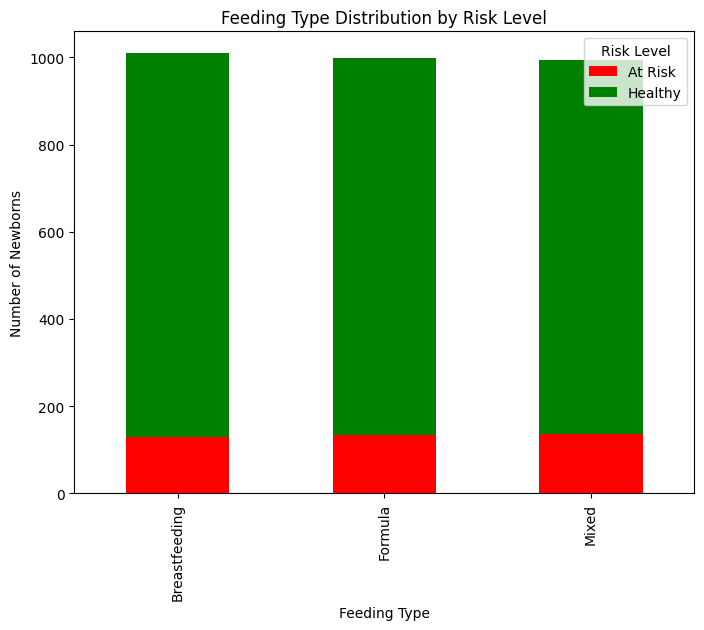

In [16]:
# Crosstab: feeding_type × risk_level
feeding_risk = pd.crosstab(df['feeding_type'], df['risk_level'])

# Plot stacked bar chart
feeding_risk.plot(
    kind='bar',
    stacked=True,
    color={'At Risk':'red', 'Healthy':'green'},
    figsize=(8,6)
)

plt.title("Feeding Type Distribution by Risk Level")
plt.xlabel("Feeding Type")
plt.ylabel("Number of Newborns")
plt.legend(title="Risk Level")
plt.show()


In the immediate newborn period (age_days 1 to a few days), the effect of breastfeeding may hardly appear. The variable risk_level seems to be defined by indicators unrelated to feeding method (such as vital signs or symptoms at a single time point). Moreover, the binary classification of “Healthy / At Risk” is too coarse, which likely obscures more subtle differences.

For example, benefits of breastfeeding such as reduced infection risk or lower complication rates would only be visible when using more detailed outcome measures (e.g., infection rates, specific complications), not with this simplified label. **太字**

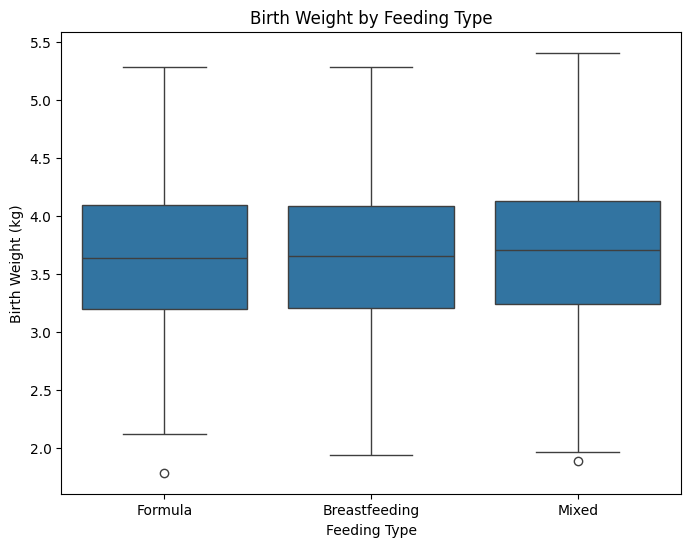

In [18]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='feeding_type', y='weight_kg', data=df)

plt.title("Birth Weight by Feeding Type")
plt.xlabel("Feeding Type")
plt.ylabel("Birth Weight (kg)")
plt.show()


/tmp/ipython-input-2127917832.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='age_days', y='weight_kg', hue='risk_level',


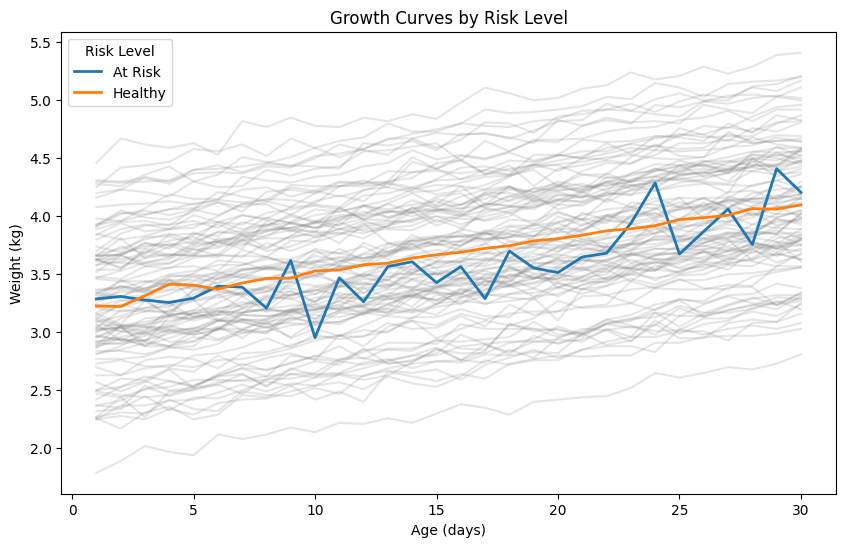

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# 個別の成長曲線（透明度を下げて薄線に）
for baby_id, group in df.groupby('baby_id'):
    plt.plot(group['age_days'], group['weight_kg'], color='gray', alpha=0.2)

# Healthy と At Risk の平均曲線
sns.lineplot(data=df, x='age_days', y='weight_kg', hue='risk_level',
             estimator='mean', ci=None, linewidth=2)

plt.title("Growth Curves by Risk Level")
plt.xlabel("Age (days)")
plt.ylabel("Weight (kg)")
plt.legend(title="Risk Level")
plt.show()


/tmp/ipython-input-3595013851.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='age_days', y='weight_kg', hue='risk_level',


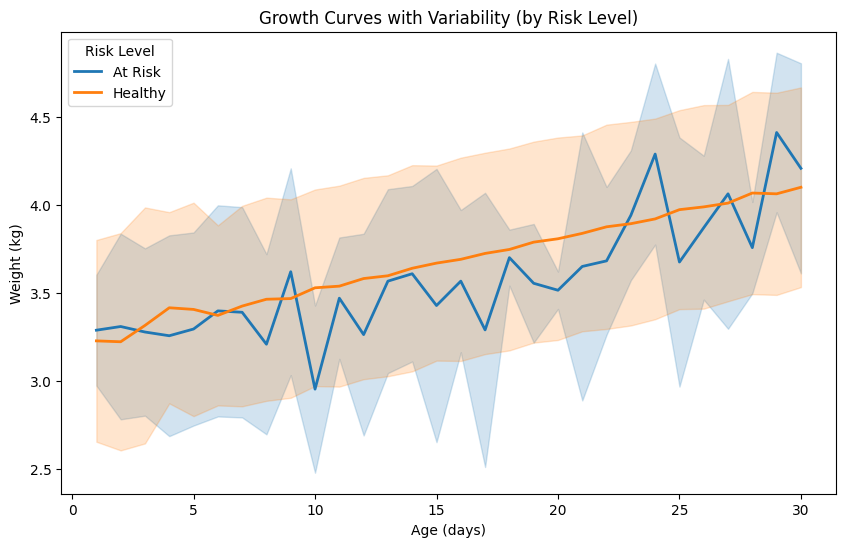

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='age_days', y='weight_kg', hue='risk_level',
             estimator='mean', ci='sd', linewidth=2)

plt.title("Growth Curves with Variability (by Risk Level)")
plt.xlabel("Age (days)")
plt.ylabel("Weight (kg)")
plt.legend(title="Risk Level")
plt.show()


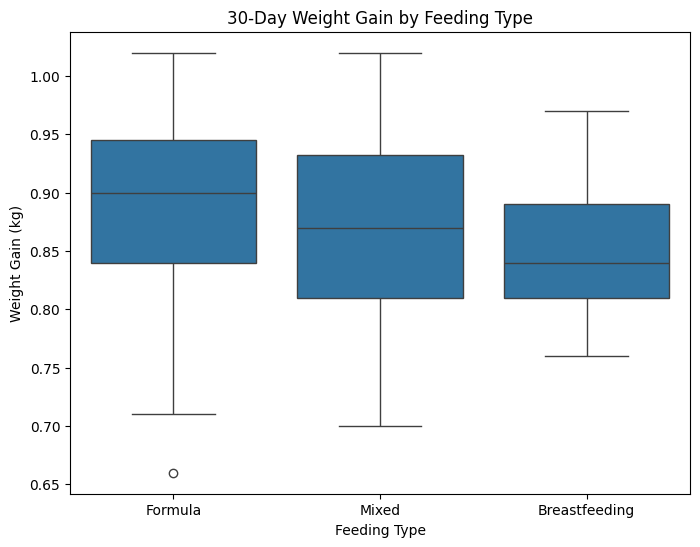

In [22]:
# 30日間の体重増加量を算出
weight_gain = df.groupby('baby_id').agg(
    feeding_type=('feeding_type','first'),  # その子の授乳法
    weight_gain=('weight_kg', lambda x: x.iloc[-1] - x.iloc[0])
).reset_index()

# 箱ひげ図で比較
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(data=weight_gain, x='feeding_type', y='weight_gain')

plt.title("30-Day Weight Gain by Feeding Type")
plt.xlabel("Feeding Type")
plt.ylabel("Weight Gain (kg)")
plt.show()


In [24]:
# 最初と最後の risk_level を抽出
risk_transition = df.groupby('baby_id').agg(
    start_risk=('risk_level', lambda x: x.iloc[0]),
    end_risk=('risk_level', lambda x: x.iloc[-1])
).reset_index()

# 遷移パターンをカウント
print(risk_transition.value_counts(['start_risk','end_risk']))


start_risk  end_risk
Healthy     Healthy     91
At Risk     Healthy      6
Healthy     At Risk      3
Name: count, dtype: int64


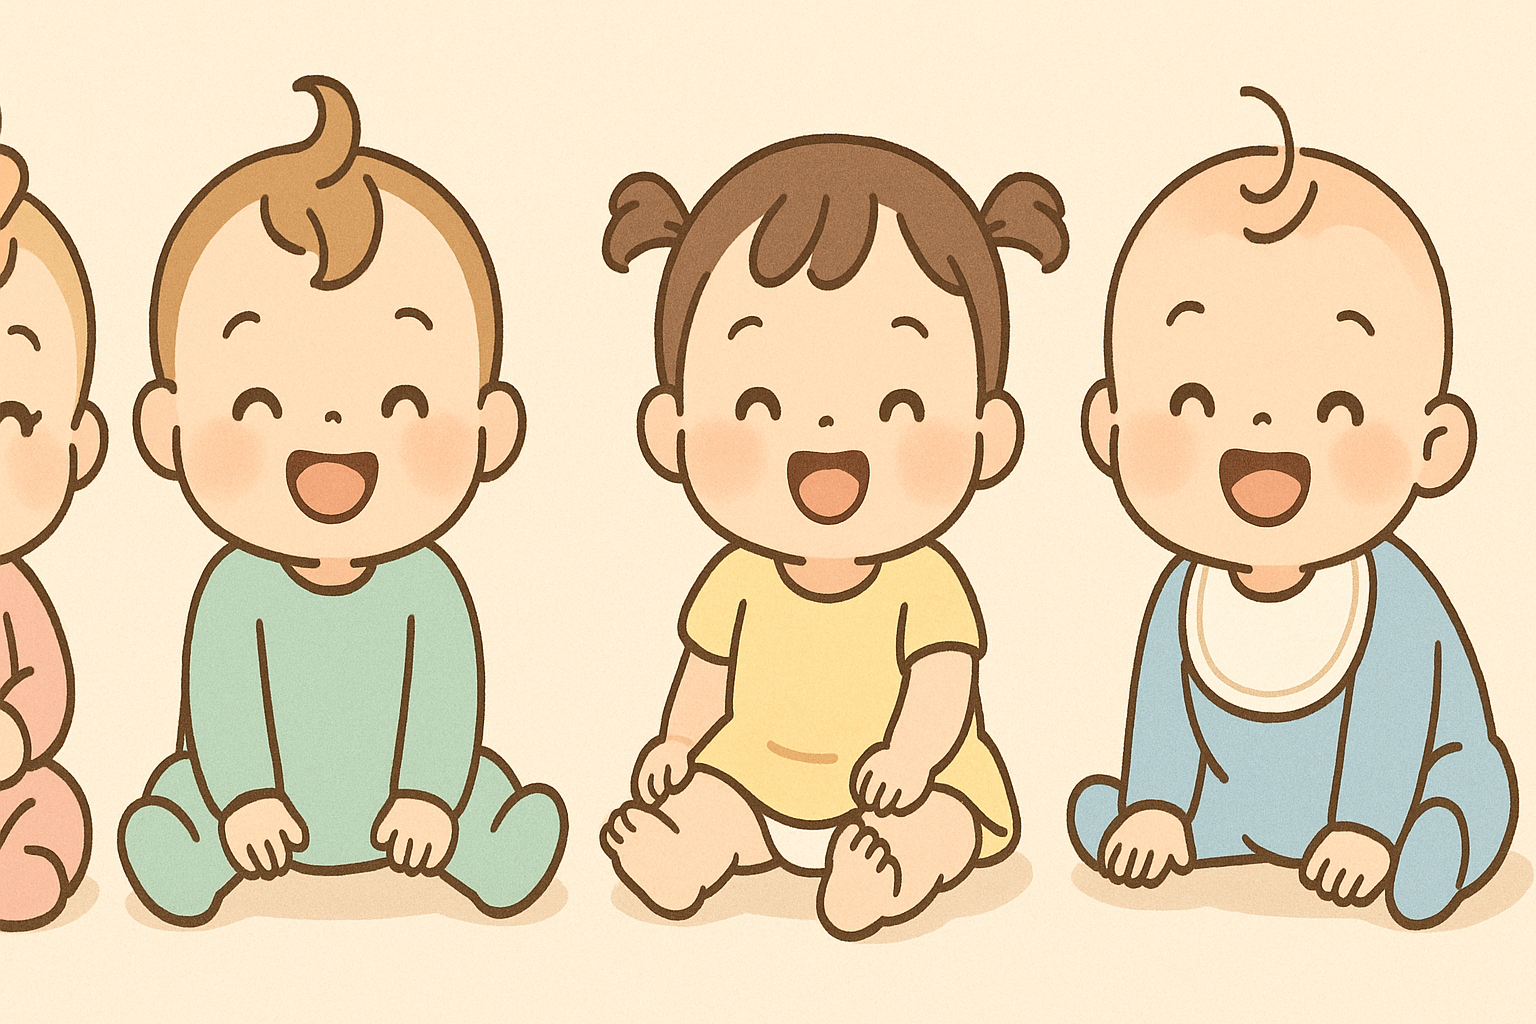

This dataset offered valuable opportunities for exploration, but the predefined labels did not align well with clinical intuition.\
In particular, “risk_level” appeared too simplistic and failed to capture meaningful differences in neonatal outcomes.\
Analyses such as feeding type vs. health status or low birth weight vs. risk produced results that contradicted medical expectations.\
This highlights the limitations of relying on coarse or poorly defined labels in medical datasets.\
Ultimately, while the dataset was useful for practicing data analysis, it yielded little clinically valuable insight.